# Welcome to Lab 4!

### Overview:
- In this lab, you'll build a linear regression model using Pandas and Scikit-Learn (AKA Sklearn) to predict whether a patient has liver disease based on their lab test results. This is a real-world dataset from the UCI Machine Learning Repository.


### What you will learn:
- How to load and explore data using Pandas and Matplotlib
- Data preprocessing and cleaning
- Building a logistic regression model
- Evaluating model performance

### Documentation:
- Scikit-learn Documentation: https://scikit-learn.org/stable/
- Pandas Documentation: https://pandas.pydata.org/docs/
- Matplotlib Documentation: https://matplotlib.org/stable/contents.html

## Section 1: Libraries Overview

### Before beginning, we need to asses all the libraries we will be using!
- **pandas**: For working with data tables (like Excel, but in Python)
- **numpy**: For mathematical operations
- **matplotlib**: For creating visualizations
- **sklearn**: The main machine learning library we'll use

In [1]:
# importing all the libraries we will be using

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Set random seed for reproducibility (so we all get the same results!)
np.random.seed(42)

## Section 2: Load and Explore the Dataset

**Summary**:
- The dataset contains information about liver patients from India. Each row
represents one patient, and the columns contain their lab test results.

**Dataset Information:**
- Age: Patient's age
- Gender: Male or Female
- Total_Bilirubin: A substance produced during the breakdown of red blood cells
- Direct_Bilirubin: A form of bilirubin
- Alkaline_Phosphotase: An enzyme found in the liver
- Alamine_Aminotransferase: An enzyme that helps metabolize proteins
- Aspartate_Aminotransferase: Another enzyme found in the liver
- Total_Protiens: Total amount of protein in blood
- Albumin: A type of protein made by the liver
- Albumin_and_Globulin_Ratio: Ratio of two types of proteins
- Dataset: Target variable (1 = liver disease, 2 = no liver disease)

In [4]:
# Load the dataset
# HINT: use pandas function .read_csv() to load the dataset
# (WRITE 1 LINE OF CODE HERE)
df = pd.read_csv('indian_liver_patient.csv')



In [10]:
# Display the first few rows of the dataset
# HINT: use the pandas function .head()
# (WRITE 1 LINE OF CODE HERE)
df.head()


# Display the last few rows of the dataset
# HINT use the pandas function .tail()
# (WRITE 1 LINE OF CODE HERE)
df.tail()




,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [13]:
# Exploring the shape of the dataset
# HINT: use pandas function .shape
# (WRITE 1 LINE OF CODE HERE)
print(df.shape)


# What does shape represent? How many rows and how many columns are there?
# Answer: The shape returns a tuple with the first value being the # of rows and the second value being the # of columns




(583, 11)


Before building a model, we need to understand our data. Let's check:
1. What types of data we have
2. Basic statistics about each feature
3. If there are any missing values
4. If there are any duplicated values

**Why is this important?**
Real-world data is messy! Missing values or incorrect data types can cause
errors in our model.

In [20]:
# Check data types, basics statistics of each feature, and missing values
print("\n📋 Dataset Information:")
# HINT: use pandas function .info()
print(df.info())


print("\n📊 Basic Statistics:")
# HINT: use pandas function .describe()
print(df.describe())


print("\n❓ Missing Values:")
# HINT: use pandas function .isnull() and sum the amount of missing/null values using .sum()
print(df.isnull().sum())

print("\n🪞 Duplicated Values:")
# HINT: use pandas function .duplicated() and sum the amount of duplicated values using .sum()
print(df.duplicated().sum())


📋 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None

📊 Basic Statistics:
              Age  Total_Bilirubin  Direc

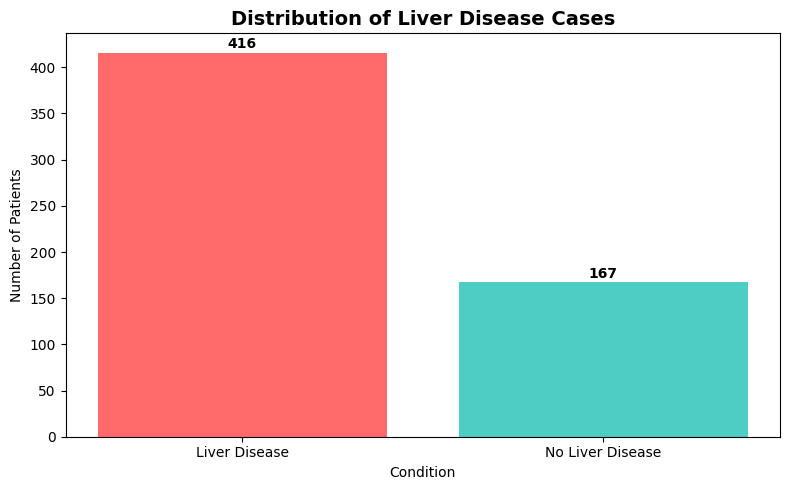

In [21]:
# Visualize the distribution of the target variable, AKA how many liver vs. no liver disease patients are there, using matplotlib?
plt.figure(figsize=(8, 5))
target_counts = df['Dataset'].value_counts()
plt.bar(['Liver Disease', 'No Liver Disease'], target_counts.values, color=['#ff6b6b', '#4ecdc4'])
plt.title('Distribution of Liver Disease Cases', fontsize=14, fontweight='bold')
plt.ylabel('Number of Patients')
plt.xlabel('Condition')
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

## 🧹 Step 3: Clean and Preprocess the Data

Now we need to prepare our data for the machine learning model:

### Handle Missing Values
Some patients might have missing test results. We need to decide what to do
with these missing values. Common approaches:
- Remove rows with missing data
- Fill missing values with the average (mean) or median

Documentation: https://pandas.pydata.org/docs/user_guide/missing_data.html

### Handle Duplicate Rows
Sometimes the same patient data might be recorded multiple times by accident.
Duplicate rows can bias our model by giving extra weight to certain patients.

**What to do:** Remove duplicate rows to ensure each patient is only counted once.

Documentation: https://pandas.pydata.org/docs/user_guide/duplicates.html


⚠️ **Important Note about inplace=True:** ⚠️
When `inplace=True`, the changes are made directly to the original dataframe and cannot be undone. Without it, pandas creates a new dataframe with the changes, leaving your original data untouched. You want to use inplace=True so your ongoing dataframe gets modified with the changes you are applying to it.

In [22]:
# Handling Missing Values (Pick one of the approaches and implement it)

# Approach 1: Remove missing/null Values
# HINT: Call .dropna() function and make sure argument inplace=True is set.
# HINT: Also, reset the index of the dataframe to avoid complications later, use .reset_index() and set arguments drop=True and inplace=True
# (WRITE 1-2 LINES OF CODE HERE)
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)


# Approach 2: Replace missing/null values with median values
# HINT: Call .fillna() function and inside it call .median() to calcualte the median of the dataframe
# HINT: Ensure the flag numeric_only=True is set so only numeric values are calculated.
# HINT: Ensure inplace=True is set
# (WRITE 1 LINE OF CODE HERE)
df.fillna(df.median(numeric_only=True), inplace=True)



In [23]:
# Handle Duplicate Rows

# Remove duplicate rows
# HINT: Call .drop_duplicates and make sure the flag inplace=True is set
# (WRITE 1 LINE OF CODE HERE)
df.drop_duplicates(inplace=True)

### Preprocessing: Encode Categorical Variables

Machine learning models work with numbers, not text. We need to convert
'Gender' (Male/Female) into numbers.

**Label Encoding:** Convert categories to numbers (e.g., Male=0, Female=1)

Documentation: https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features

In [24]:
# Encode the Gender column using LabelEncoder
# Step 1: Create a LabelEncoder object
# HINT: Create an instance of LabelEncoder() and store it in variable 'le'
# WRITE 1 LINE OF CODE HERE
le = LabelEncoder()
# Step 2: Transform the Gender column
# HINT: Use le.fit_transform() on df['Gender'] and assign it back to df['Gender']
# WRITE 1 LINE OF CODE HERE
df['Gender'] = le.fit_transform(df['Gender'])


### Preprocessing: Preparing Target Variable
Our target variable 'Dataset' currently has values:
- 1 = liver disease
- 2 = no liver disease

Let's convert them to 0 and 1 for easier interpretation:
- 0 = no liver disease
- 1 = liver disease

In [25]:
# Adjusting target variable from 1 (liver disease) and 2 (no liver disease) ---> 0 (no liver disease) and 1 (liver disease)
# HINT: Use .replace() function with a dictionary {2: 0} to replace value 2 with 0
# HINT: The syntax is: df['Dataset'] = df['Dataset'].replace({old_value: new_value})
# WRITE 1 LINE OF CODE HERE
df['Dataset'] = df['Dataset'].replace({2: 0})


### Preprocessing: Separate Features and Target
Now we need to separate our data into:
- **X**: Features (all columns except 'Dataset')
- **y**: Target (only the 'Dataset' column)"

In [26]:
# Drop the target variable from the data to create only the feature data, stored as X\n",
# HINT: Use .drop() function with 'Dataset' as the column name and axis=1\n",
# WRITE 1 LINE OF CODE HERE
X = df.drop('Dataset', axis=1)

# Store the target variable in a separate variable called y
# HINT: Simply select the 'Dataset' column from df
# WRITE 1 LINE OF CODE HERE
y = df['Dataset']


Preprocessing: Scale the Features
**Why do we scale?**
Different features have different ranges (e.g., Age might be 20-80, but Albumin might be 2-5). Machine learning models perform better when all features are on a similar scale.

**StandardScaler:** Transforms features to have mean=0 and standard deviation=1

Formula: `scaled_value = (value - mean) / standard_deviation`

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"


In [27]:
# Scale the feature data using a StandardScaler

# Step 1: Create a StandardScaler object
# HINT: Create an instance of StandardScaler() and store it in variable 'scaler'
# WRITE 1 LINE OF CODE HERE
scaler = StandardScaler()

# Step 2: Fit and transform the features
# HINT: Use scaler.fit_transform(X) and assign the result back to X
# WRITE 1 LINE OF CODE HERE
X = scaler.fit_transform(X)

## ✂️ Step 4: Split Data into Training and Testing Sets

**Why do we split the data?**
We need to test our model on data it hasn't seen before to see if it can
generalize. Think of it like studying for a test with practice problems,
then taking the real test with different questions.

**Common split:** 80% for training, 20% for testing

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [28]:
# Split the data into training and testing sets
# X is the feature data, y is the target variable data

# HINT: Use train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
# HINT: Assign the result to X_train, X_test, y_train, y_test
# WRITE 1 LINE OF CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## 🤖 Step 5: Build and Train the Logistic Regression Model

**What is Logistic Regression?**
Despite its name, logistic regression is used for classification (predicting
categories), not regression. It predicts the probability of a patient having
liver disease.

**How it works:**
The model learns weights for each feature that indicate how much that feature
contributes to the prediction.

Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [31]:
# Training Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# Logistic Regression Classifier
log_reg = LogisticRegression(random_state=25)
log_reg.fit(X_train, y_train)

# Build and train the Logistic Regression Model

# Step 1: Create a LogisticRegression object
# HINT: Create an instance of LogisticRegression(random_state=42) and store it in variable 'log_reg'
# WRITE 1 LINE OF CODE HERE
log_reg = LogisticRegression(random_state=42)

# Step 2: Train the model
# HINT: Use log_reg.fit(X_train, y_train) to train the model
# WRITE 1 LINE OF CODE HERE
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

## 🎯 Step 6: Make Predictions

Now that our model is trained, let's use it to predict liver disease for
patients in our test set.

The model will output:
- 0: No liver disease predicted
- 1: Liver disease predicted

In [32]:
# Make predictions using the trained model

# HINT: Use log_reg.predict(X_test) to make predictions and store them in 'log_reg_pred'
# WRITE 1 LINE OF CODE HERE
log_reg_pred = log_reg.predict(X_test)

## 📈 Step 7: Evaluate Model Performance

**How do we know if our model is good?**
We compare its predictions to the actual values using several metrics:
### Accuracy:
- the percentage of correct predictions.
### Classification Report:
- **Precision:** Of all positive predictions, how many were correct?
- **Recall:** Of all actual positives, how many did we find?
- **F1-Score:** Harmonic mean of precision and recall
A confusion matrix shows us four important values:
- **True Positives (TP):** Correctly predicted liver disease
- **True Negatives (TN):** Correctly predicted no liver disease
- **False Positives (FP):** Incorrectly predicted liver disease (Type I error)
- **False Negatives (FN):** Incorrectly predicted no liver disease (Type II error)

Documentation:
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [33]:
# created a custom function to calculate the accuracy, precision, recall, and F1 score for each model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metric_calculations(y_true, y_pred):

    # calculate the accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"Accuracy Score: {accuracy:.2f}")
    print(f"Precision Score: {precision:.2f}")
    print(f"Recall Score: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return f1

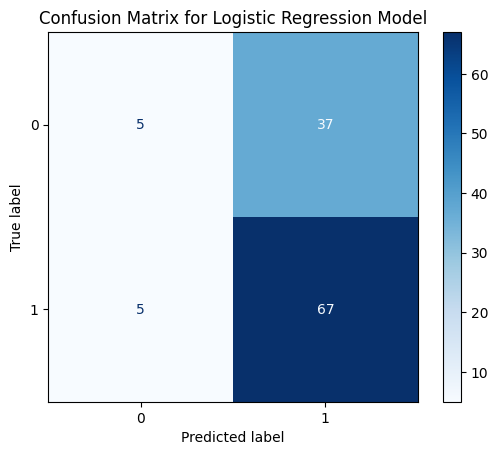

In [34]:
# Confusion matrix for logistic regression model, already done!
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm_lrc = confusion_matrix(y_test, log_reg_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lrc, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

In [35]:
# Print the F1 score for logistic regression model using the custom function
print('Logistic Regression Model F1 Score:')
log_reg_f1 = metric_calculations(y_test, log_reg_pred)

Logistic Regression Model F1 Score:
Accuracy Score: 0.63
Precision Score: 0.64
Recall Score: 0.93
F1 Score: 0.76
